# MVR 310 PRAC 1: Accelerometers


In [5]:
import numpy as np
def fint(x,fs,IS=1,lc=0.0):

# 	fint(x,fs,IS=1,lc=0.0)

# 	fint      Integrates a time domain signal IS times in the frequency domain.

# 	Parameters
# 	----------
# 	x       Time signal to be integrated.  Can be 1D list or 1D Numpy array.
# 	fs      Sampling frequency [Hz]
# 	IS      Number of integration steps to be performed, default to 1.
# 	lc      Lower cut-off frequency [Hz], default to 0
# 	Returns
# 	-------
# 	y	Integrated signal
# 	t	Time array corresponding to the elements in y

# 	The frequency components of time signal x lying between 0 Hz and lc 
# 	is zeroed in the frequency domain.
# 	Furthermore 0-padding of the signal may be done to get a signal length of 2^n.
# 	This will greatly reduce the computational time needed for the FFT,
# 	and IFFT operations.
# 	Dynamic Systems Group/Centre for Asset Integrity Management
# 	HJ van Niekerk 1993-08-03 
# 	Modified by PS Heyns 1999-05-24; 2006-05-29
# 	Modified by DH Diamond 2014-08-22

	h = np.fft.rfft(np.array(x)) # Compute the fft of a real input	
	N = len(h)
	df = fs/float(len(x))
	freq = np.arange(N) * df # Get the frequencies
	cutoff_index = np.where(freq < lc)[0]
	if len(cutoff_index) != 0:
		cutoff_index = cutoff_index[-1]
		h[:cutoff_index+1] = np.zeros(len(h[:cutoff_index+1])) # Get the cutoff frequency
	omega = freq * 2 * np.pi
	omega[0] = 1
	g = h / (1j * omega)**IS
	y = np.fft.irfft(g)
	return y, np.arange(len(y)) * 1/fs

## 3Hz: Unclamped

In [13]:
# Reading data & integration
import pandas as pd
import numpy as np

pdata1 = pd.read_excel('26Hz_Clamped.xls', sheet_name='Sheet2') 
pdata1.head()
print(pdata1.keys())

time = pdata1['Time [s]'].to_numpy()
time = time[0:len(time)-1]
accel3hz1 = pdata1['Accelerometer_1 [g]'].to_numpy() 
accel3hz2 = pdata1['Accelerometer_2 [g]'].to_numpy() 
accel3hz3 = pdata1['Accelerometer_3 [g]'].to_numpy() 
accel3hz4 = pdata1['Accelerometer_4 [g]'].to_numpy() 
accel3hz5 = pdata1['Accelerometer_5 [g]'].to_numpy() 

# Displacements
disp3hz_1 = fint(accel3hz1,1200,IS=2,lc=2.0)[0]*9.81 #; print(disp3hz_1) 
disp3hz_2 = fint(accel3hz2,1200,IS=2,lc=2.0)[0]*9.81
disp3hz_3 = fint(accel3hz3,1200,IS=2,lc=2.0)[0]*9.81
disp3hz_4 = fint(accel3hz4,1200,IS=2,lc=2.0)[0]*9.81
disp3hz_5 = fint(accel3hz5,1200,IS=2,lc=2.0)[0]*9.81

Index(['Time [s]', 'Accelerometer_1 [g]', 'Accelerometer_2 [g]',
       'Accelerometer_3 [g]', 'Accelerometer_4 [g]', 'Accelerometer_5 [g]'],
      dtype='object')


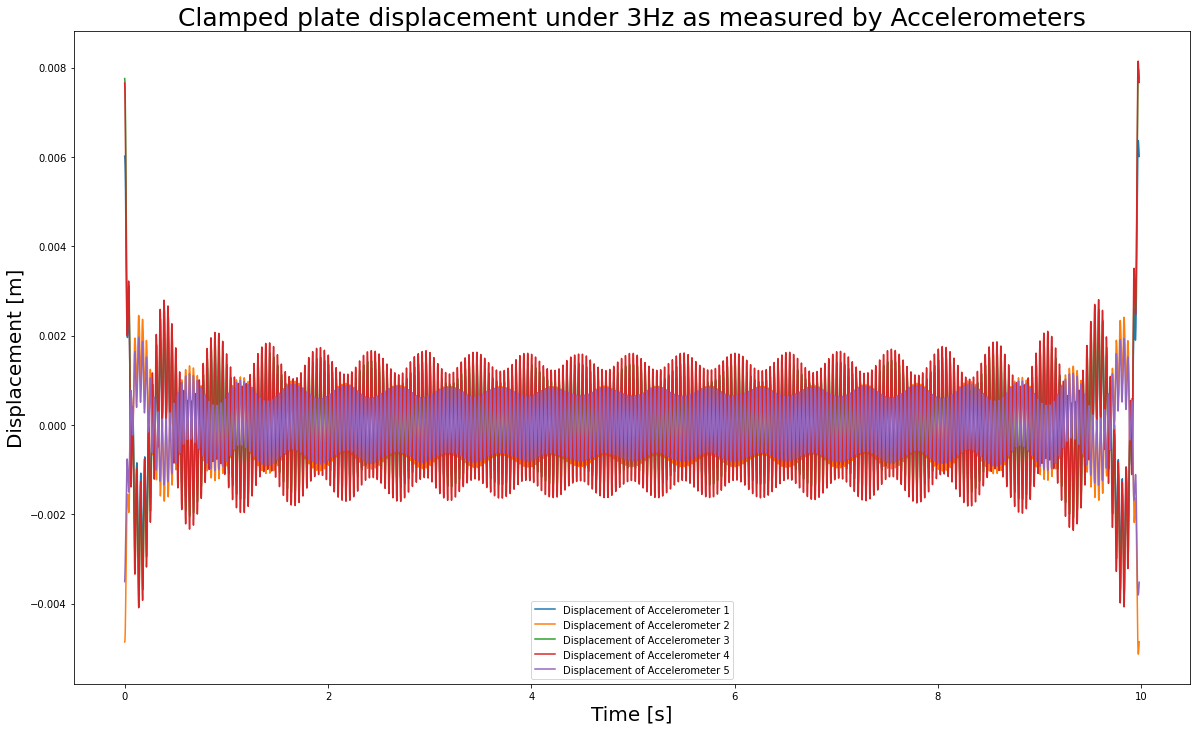

In [14]:
# Plotting
#%matplotlib qt5
import matplotlib 
from matplotlib import pyplot as plt

fig1 = plt.figure(1,figsize=(20,12))
ax = fig1.add_subplot(111)
ax.plot(time[0:12020],disp3hz_1, label='Displacement of Accelerometer 1') 
ax.plot(time[0:12020],disp3hz_2, label='Displacement of Accelerometer 2') 
ax.plot(time[0:12020],disp3hz_3, label='Displacement of Accelerometer 3') 
ax.plot(time[0:12020],disp3hz_4, label='Displacement of Accelerometer 4') 
ax.plot(time[0:12020],disp3hz_5, label='Displacement of Accelerometer 5') 

plt.title('Clamped plate displacement under 3Hz as measured by Accelerometers', fontsize=25)
plt.xlabel('Time [s]', fontsize=20)
plt.ylabel('Displacement [m]', fontsize=20)
plt.legend()
plt.show()

## 5Hz: Unclamped

In [ ]:
# Reading data & integration
import pandas as pd
import numpy as np

pdata2 = pd.read_excel('5Hz_Clamped.xls', sheet_name='Sheet2') 
pdata2.head()
print(pdata2.keys())

time = pdata2['Time [s]'].to_numpy() 
accel5hz1 = pdata2['Accelerometer_1 [g]'].to_numpy() 
accel5hz2 = pdata2['Accelerometer_2 [g]'].to_numpy() 
accel5hz3 = pdata2['Accelerometer_3 [g]'].to_numpy() 
accel5hz4 = pdata2['Accelerometer_4 [g]'].to_numpy() 
accel5hz5 = pdata2['Accelerometer_5 [g]'].to_numpy() 

# Displacements
disp5hz_1 = fint(accel5hz1,1200,IS=2,lc=2.0) ; disp5hz_1 = disp5hz_1[0]*9.81 
disp5hz_2 = fint(accel5hz2,1200,IS=2,lc=2.0) ; disp5hz_2 = disp5hz_2[0]*9.81
disp5hz_3 = fint(accel5hz3,1200,IS=2,lc=2.0) ; disp5hz_3 = disp5hz_3[0]*9.81
disp5hz_4 = fint(accel5hz4,1200,IS=2,lc=2.0) ; disp5hz_4 = disp5hz_4[0]*9.81
disp5hz_5 = fint(accel5hz5,1200,IS=2,lc=2.0) ; disp5hz_5 = disp5hz_5[0]*9.81

Index(['Time [s]', 'Accelerometer_1 [g]', 'Accelerometer_2 [g]',
       'Accelerometer_3 [g]', 'Accelerometer_4 [g]', 'Accelerometer_5 [g]'],
      dtype='object')


In [ ]:
# Plotting
# %matplotlib qt5
# import matplotlib 
# from matplotlib import pyplot as plt

fig2 = plt.figure(2,figsize=(20,12))
ax = fig2.add_subplot(111)
ax.plot(time[0:12020],disp5hz_1, label='Displacement of Accelerometer 1') 
ax.plot(time[0:12020],disp5hz_2, label='Displacement of Accelerometer 2') 
ax.plot(time[0:12020],disp5hz_3, label='Displacement of Accelerometer 3') 
ax.plot(time[0:12020],disp5hz_4, label='Displacement of Accelerometer 4') 
ax.plot(time[0:12020],disp5hz_5, label='Displacement of Accelerometer 5') 

plt.title('Clamped plate displacement under 5Hz as measured by Accelerometers', fontsize=25)
plt.xlabel('Time [s]', fontsize=20)
plt.ylabel('Displacement [m]', fontsize=20)
plt.legend()
plt.show()

## 26Hz: Unclamped

In [ ]:
# Reading data & integration
import pandas as pd
import numpy as np

pdata3 = pd.read_excel('26Hz_Clamped.xls', sheet_name='Sheet2') 
pdata3.head()
print(pdata3.keys())

time = pdata3['Time [s]'].to_numpy() 
accel26hz1 = pdata3['Accelerometer_1 [g]'].to_numpy() 
accel26hz2 = pdata3['Accelerometer_2 [g]'].to_numpy() 
accel26hz3 = pdata3['Accelerometer_3 [g]'].to_numpy() 
accel26hz4 = pdata3['Accelerometer_4 [g]'].to_numpy() 
accel26hz5 = pdata3['Accelerometer_5 [g]'].to_numpy() 

# Displacements
disp26hz_1 = fint(accel26hz1,1200,IS=2,lc=2.0) ; disp26hz_1 = disp26hz_1[0]*9.81 
disp26hz_2 = fint(accel26hz2,1200,IS=2,lc=2.0) ; disp26hz_2 = disp26hz_2[0]*9.81
disp26hz_3 = fint(accel26hz3,1200,IS=2,lc=2.0) ; disp26hz_3 = disp26hz_3[0]*9.81
disp26hz_4 = fint(accel26hz4,1200,IS=2,lc=2.0) ; disp26hz_4 = disp26hz_4[0]*9.81
disp26hz_5 = fint(accel26hz5,1200,IS=2,lc=2.0) ; disp26hz_5 = disp26hz_5[0]*9.81

Index(['Time [s]', 'Accelerometer_1 [g]', 'Accelerometer_2 [g]',
       'Accelerometer_3 [g]', 'Accelerometer_4 [g]', 'Accelerometer_5 [g]'],
      dtype='object')


In [ ]:
# Plotting
# %matplotlib qt5
# import matplotlib 
# from matplotlib import pyplot as plt

fig3 = plt.figure(3,figsize=(20,12))
ax = fig3.add_subplot(111)
ax.plot(time[0:11978],disp26hz_1, label='Displacement of Accelerometer 1') 
ax.plot(time[0:11978],disp26hz_2, label='Displacement of Accelerometer 2') 
ax.plot(time[0:11978],disp26hz_3, label='Displacement of Accelerometer 3') 
ax.plot(time[0:11978],disp26hz_4, label='Displacement of Accelerometer 4') 
ax.plot(time[0:11978],disp26hz_5, label='Displacement of Accelerometer 5') 

plt.title('Clamped plate displacement under 26Hz as measured by Accelerometers', fontsize=25)
plt.xlabel('Time [s]', fontsize=20)
plt.ylabel('Displacement [m]', fontsize=20)
plt.legend()
plt.show()

In [ ]:
# help(plt.figure)